In [14]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from typing import Dict
import pandas as pd
import numpy as np
import os

In [3]:
DATASET_FOLDER = './dataset/'
TRAIN_FILE = 'train.csv'
IMAGE_FOLDER = "./imgs/"

In [4]:
trainData = pd.read_csv(os.path.join(DATASET_FOLDER, TRAIN_FILE))

In [5]:
print(trainData.columns)
trainData.head()

Index(['image_link', 'group_id', 'entity_name', 'entity_value'], dtype='object')


,image_link,group_id,entity_name,entity_value
0,https://m.media-amazon.com/images/I/61I9XdN6OF...,748919,item_weight,500.0 gram
1,https://m.media-amazon.com/images/I/71gSRbyXmo...,916768,item_volume,1.0 cup
2,https://m.media-amazon.com/images/I/61BZ4zrjZX...,459516,item_weight,0.709 gram
3,https://m.media-amazon.com/images/I/612mrlqiI4...,459516,item_weight,0.709 gram
4,https://m.media-amazon.com/images/I/617Tl40LOX...,731432,item_weight,1400 milligram


In [6]:
trainData['datapoint_id'] = trainData.index

## Assigning Images an ID

In [7]:
imageMap : Dict[str, int] = { image : id for id, image in enumerate(trainData['image_link'].unique()) }
trainData['image_id'] = trainData['image_link'].map(lambda x : imageMap.get(x, -1))

In [8]:
from src.image import Image

c:\Users\Jai Bhatnagar\AppData\Local\Programs\Python\Python310\lib\site-packages\requests\__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.16) or chardet (5.2.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn(


In [17]:
index = 75351
sampleImage = Image(trainData['image_link'][index], trainData['image_id'][index])

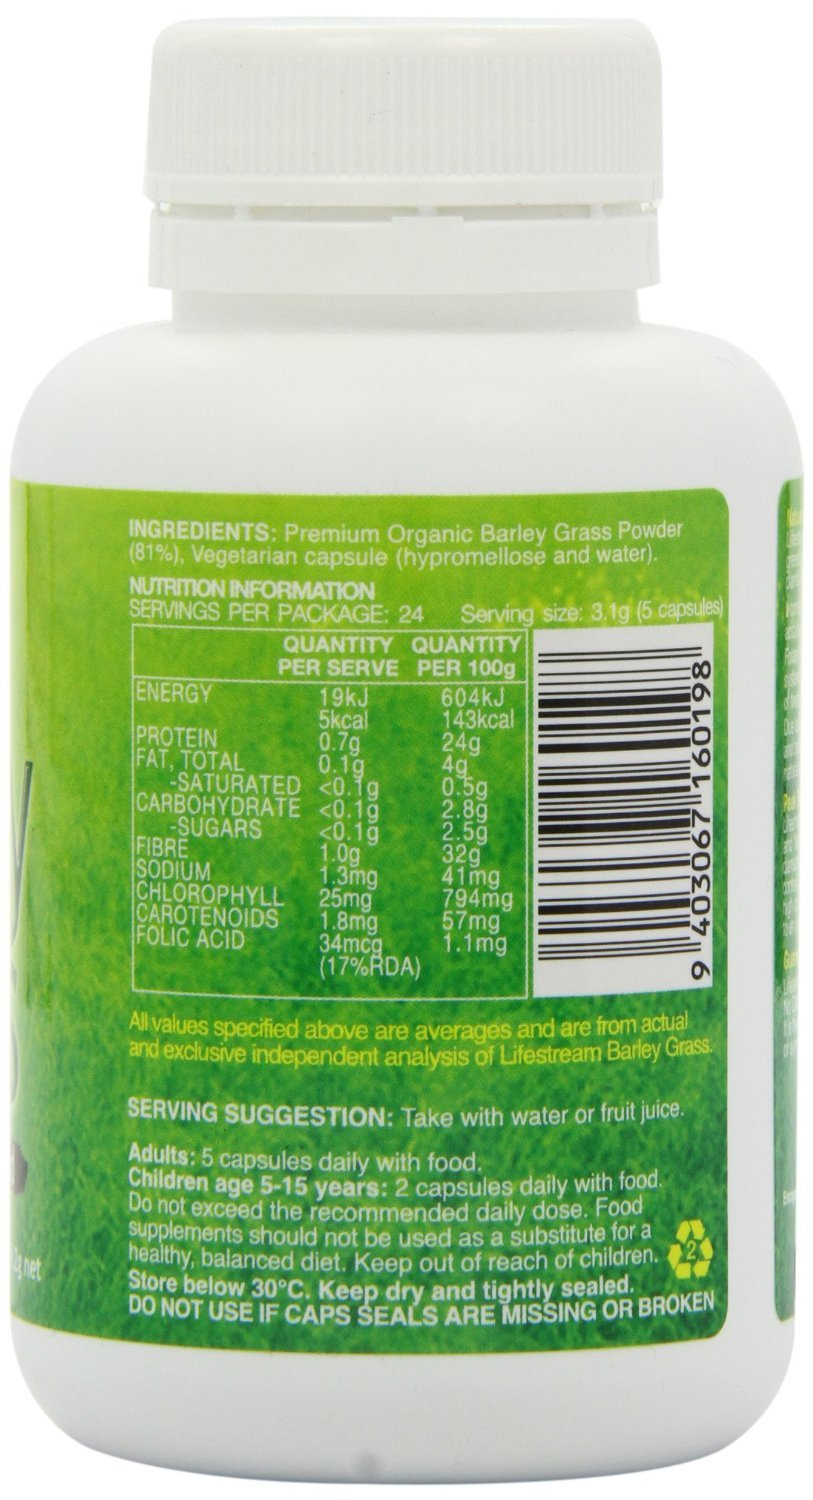

In [18]:
sampleImage.getImage()

In [19]:
print(sampleImage.readTextFrom())

INGREDIENTS; Premium Organic Barley Grass Powder
(81%), Vegetarian capsule (nypromellose and water);
NUIRITION INFORMATION 
SERVINGS PER PACKAGE: 24 Serving sizen 3,19 (6 capsules)
QuANTITY QUANTITY
Per SerVE PER 100g
jenerGy 19kJ 604kJ
Skcal 143kcal 
IPROTEIN 0.79 24g
FAT; TOTAL
SATURATED K0 3
CARBOHYDRATE <0 9 ? 8g
SUGARS <0.1g 5g
FIBRE Og 32g
ISODIUM Jmg 41mg
CHLOROPHYLL 25mg 794mg
JFobe Aciois Bmg 57mg
ACID
{TGRDA) 
Allvalues specifed above are averages and are from actual
and exclusive independent analysis of Lifestream Barley Grass
SERVING SUGGESTION: Take with water or fruit juice:
Adults: 5 capsules daily with food;
Children age 5 15 years: 2 capsules daily with food
Do not exceed the recommended daily dose: Food 
supplements should not be used as & substitute for a
ut healthy; balanced diet; Keep out of reach of children;
Store' below 30*C.Keep dry and tightly sealed;
DO NOT USE IF CAPS SEALS ARE MISSING OR BROKEN


In [20]:
import easyocr as ocr
reader = ocr.Reader(['en'], gpu=True)

In [21]:
result = reader.readtext(sampleImage.image)
print(result)

[([[122, 511], [689, 511], [689, 552], [122, 552]], 'INGREDIENTS; Premium Organic Barley Grass Powder', 0.8162036379403471), ([[121, 535], [659, 535], [659, 575], [121, 575]], '(81%), Vegetarian capsule (nypromellose and water);', 0.4866180742897568), ([[124, 570], [383, 570], [383, 607], [124, 607]], 'NUIRITION INFORMATION ', 0.5008857293071522), ([[122, 593], [431, 593], [431, 631], [122, 631]], 'SERVINGS PER PACKAGE: 24', 0.6263313077681578), ([[454, 592], [728, 592], [728, 631], [454, 631]], 'Serving sizen 3,19 (6 capsules)', 0.14610359469830494), ([[279, 631], [395, 631], [395, 655], [279, 655]], 'QuANTITY', 0.34971394500882347), ([[408, 632], [524, 632], [524, 658], [408, 658]], 'QUANTITY', 0.8986750752348998), ([[274, 654], [402, 654], [402, 682], [274, 682]], 'Per SerVE', 0.17318420882195013), ([[414, 654], [520, 654], [520, 684], [414, 684]], 'PER 100g', 0.8064679286326399), ([[129, 674], [218, 674], [218, 711], [129, 711]], 'jenerGy', 0.25343890723665435), ([[316, 684], [374,